Fourier Transform tried... needs more study though

More fundamentally, will this approach meaningful? 

Will there be any fundamental signal controlling the stock price? 

Certainly not for all companies, but maybe for some companies

-> 

Too high sensitivity... 


In [2]:
import pandas as pd

data = pd.read_feather('data/PER_to_analyze.feather')

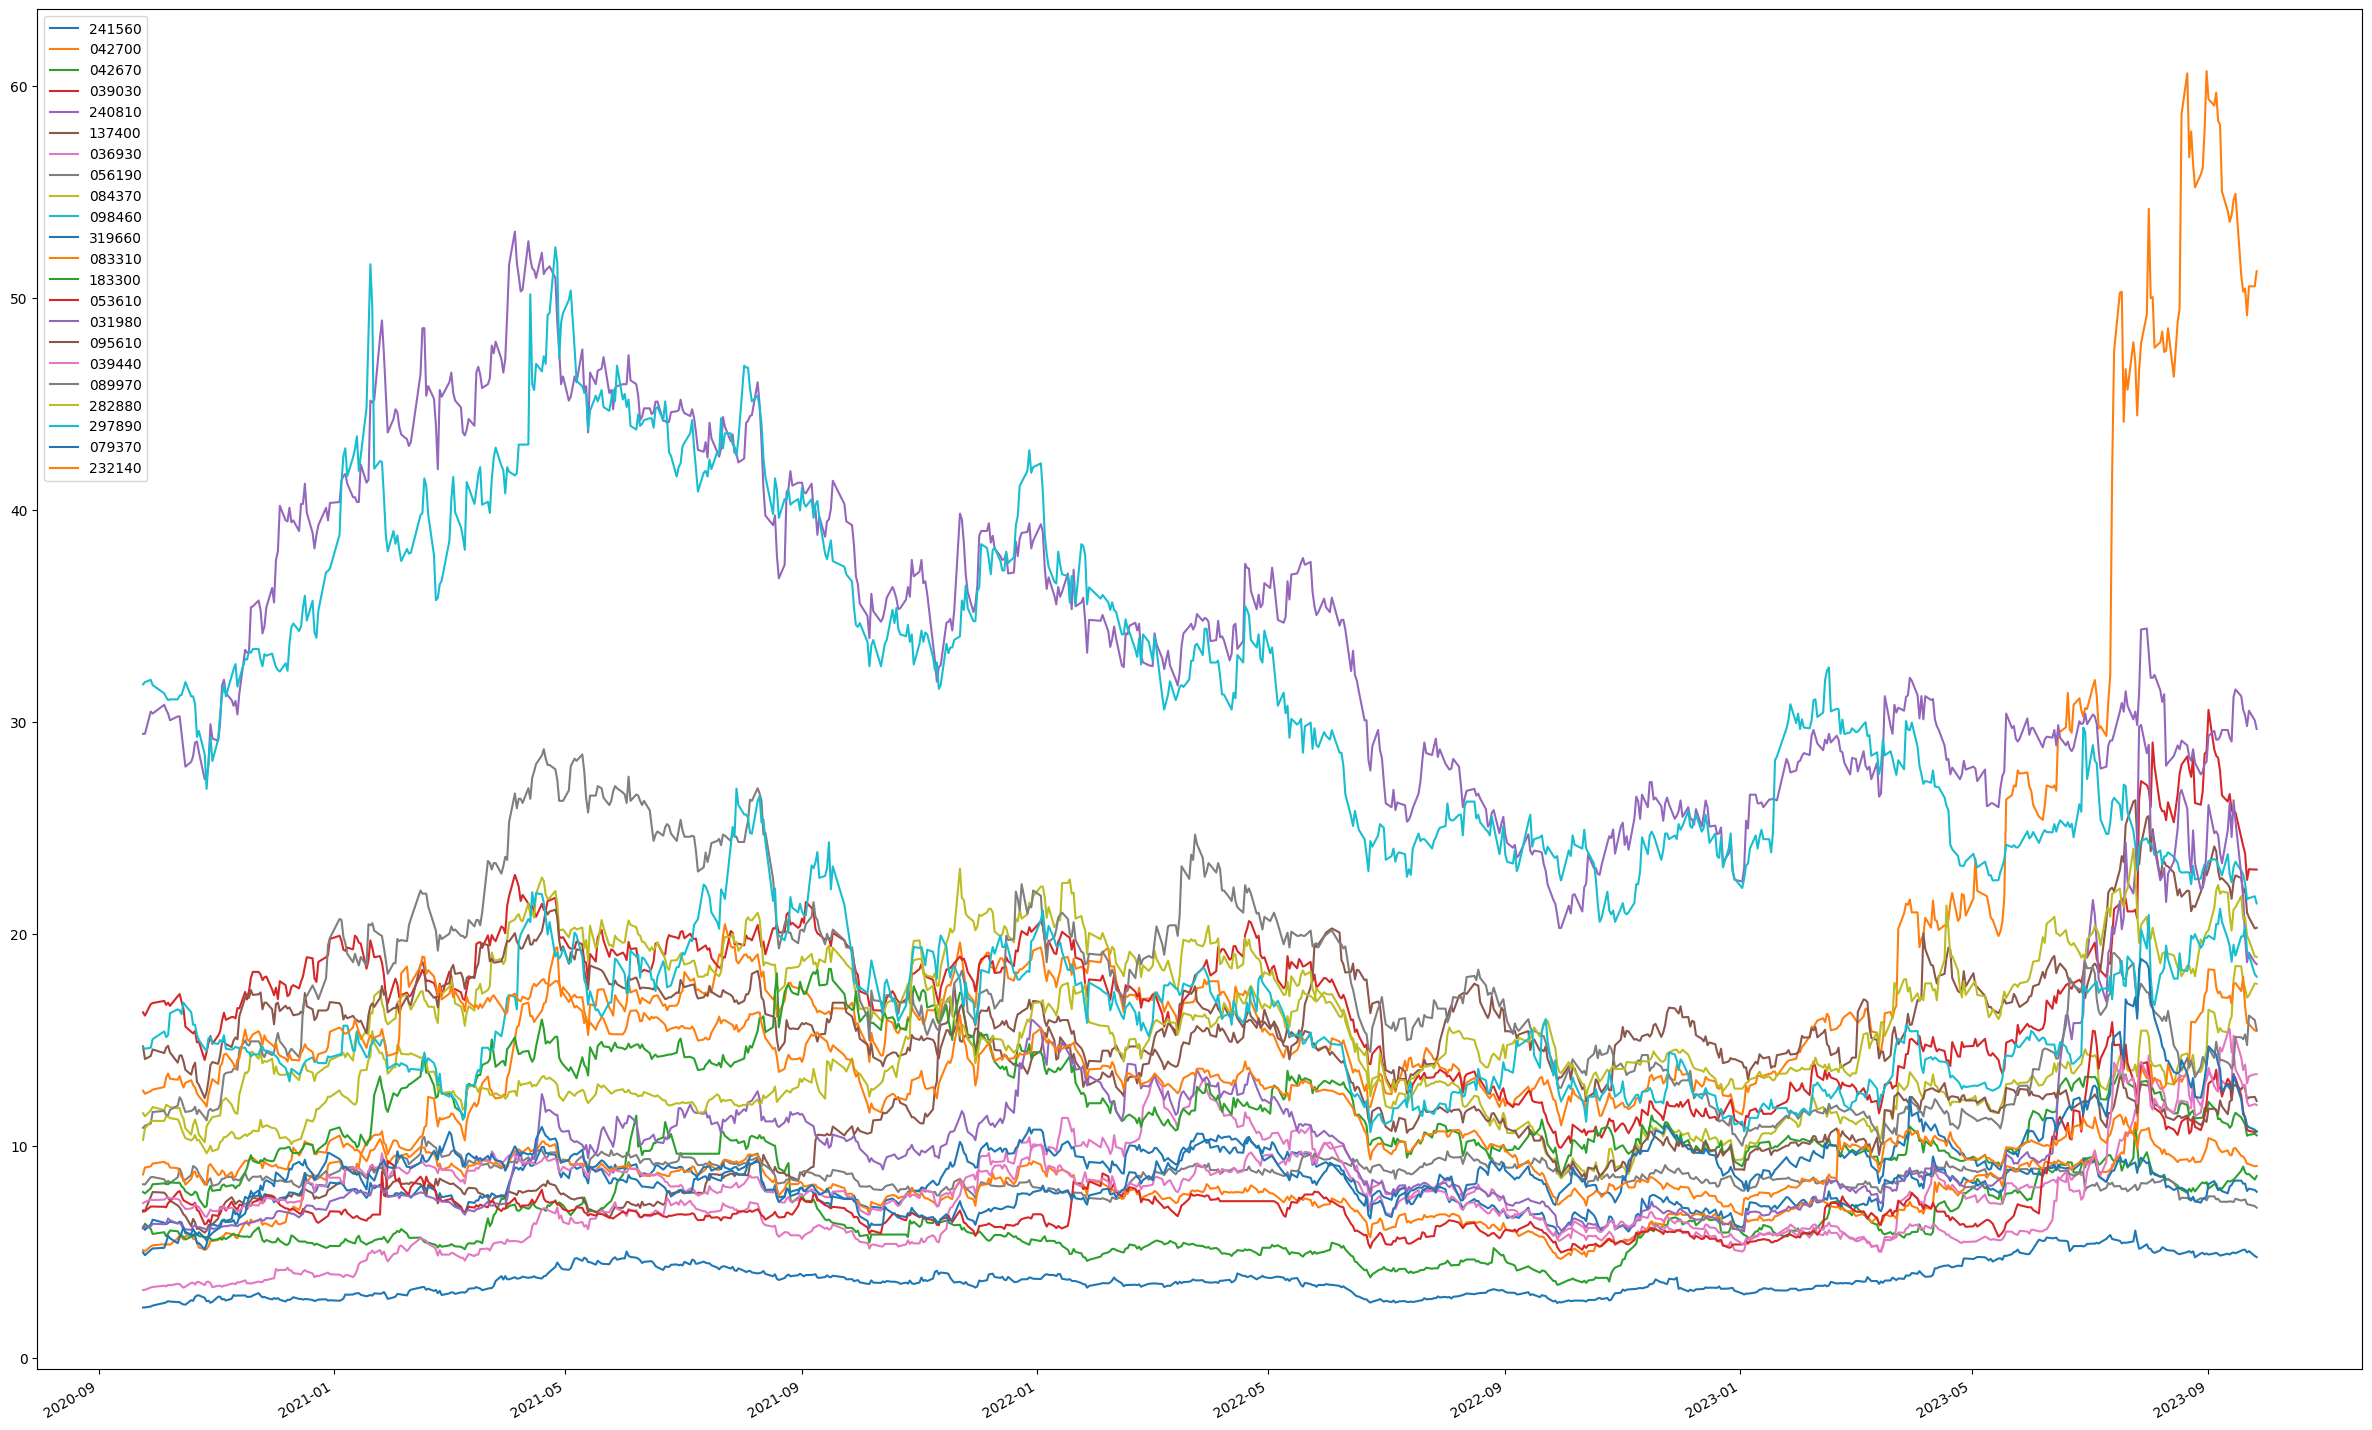

In [4]:
ax = data.plot(figsize=(30,20))

array([ 2.74036530e+03  -0.j        ,  1.20980326e+02 -38.50171406j,
       -2.18653287e+00+236.39056178j, -5.05695673e+01+211.96640545j,
        3.75580728e+01+141.04937442j, -3.70618617e+01 +40.92175011j,
       -3.75447182e+01 -12.14815567j, -2.83021880e+01 +41.95370188j,
        3.19695833e+00 +13.90196754j, -5.57703392e+00 +45.75970664j])

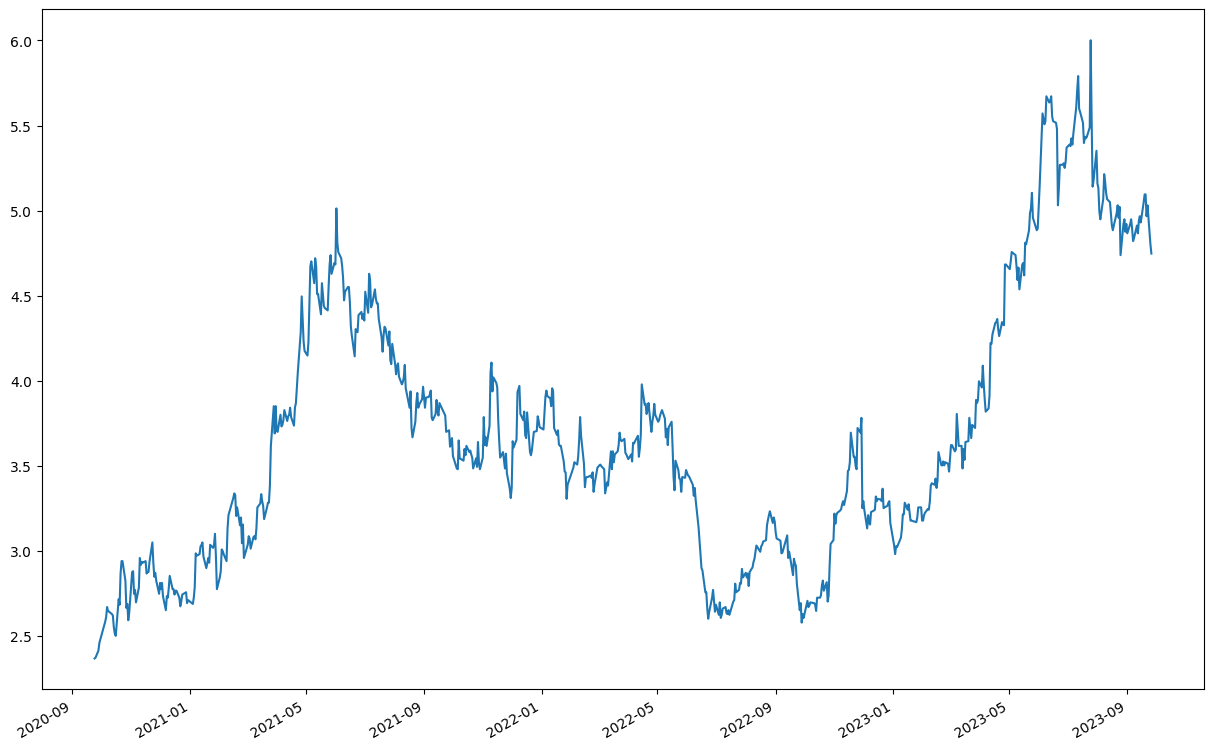

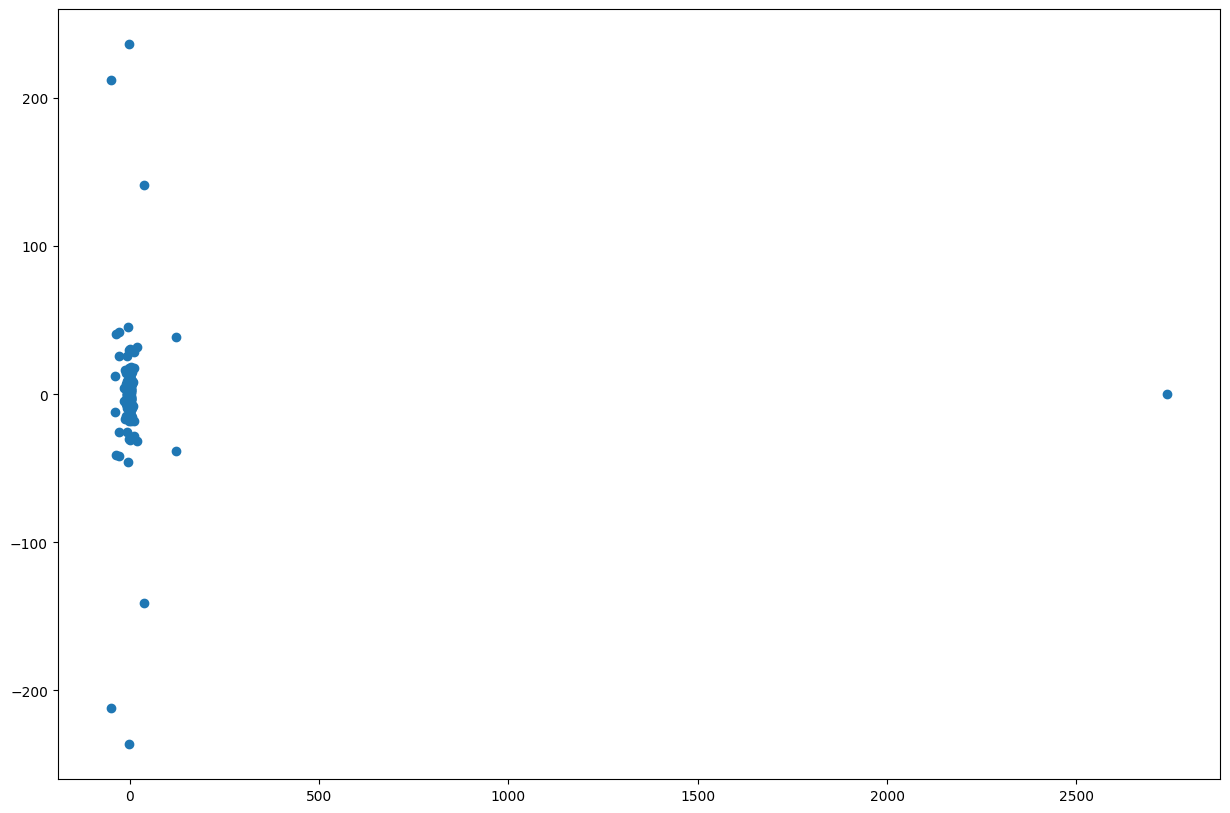

In [3]:
from scipy.fft import fft, ifft
from matplotlib import pyplot as plt
import numpy as np

x = data['241560']
x.plot(figsize=(15,10))
x = x.to_numpy()
y = fft(x)
display(y[:10])
plt.figure(figsize=(15,10))
plt.scatter(y.real, y.imag) # Natually this appears as symmetric

0.7094707150578886
0.49146449624785266


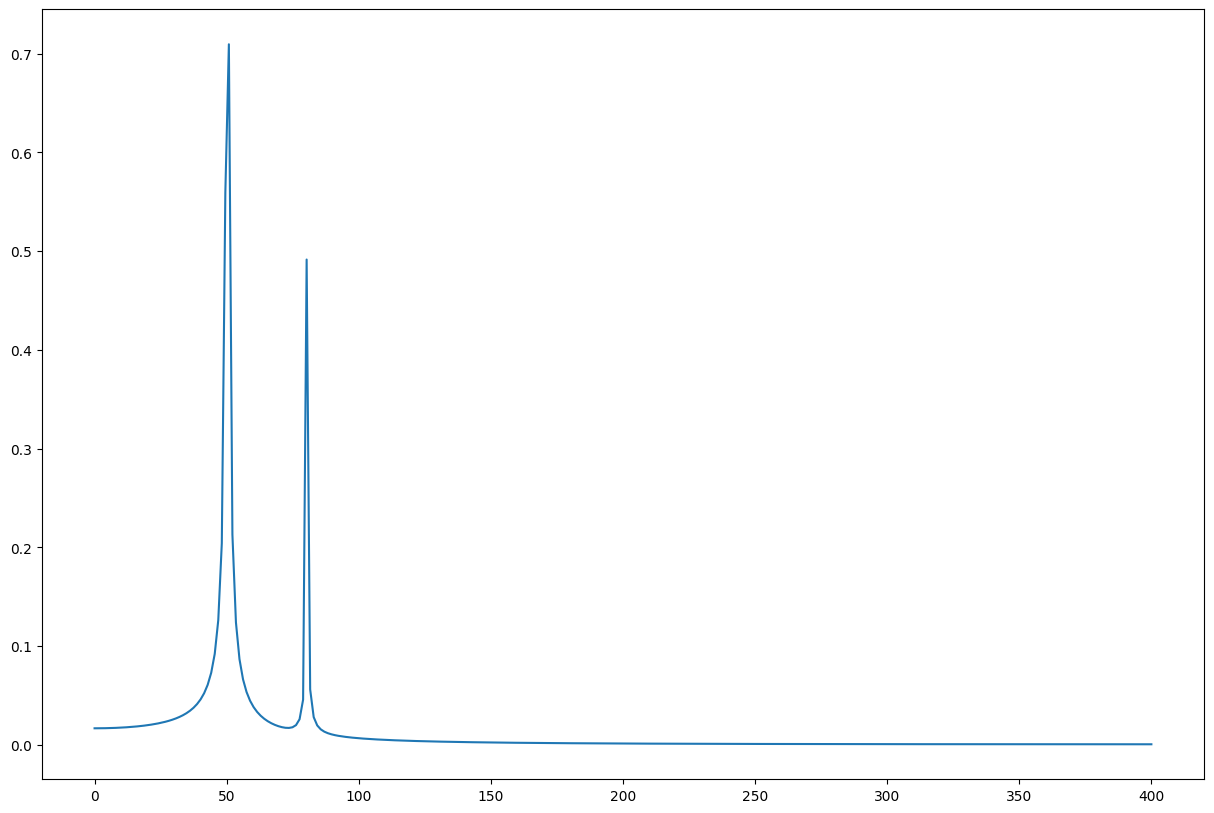

In [41]:
## EXAMPLE
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

# Number of samplepoints
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N) # a bit cleaner if endpoint=False as this start from 0 
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2) # up to half way of sample numbers N//2 (integer div), Nyquist theorem; and up to half hertz (1/T)/2, which is sample spacing

freq1 = np.argmax(abs(yf))
print(abs(yf[freq1])*2/N) 
# The mag result is not equal to 1, as this is related with sampling spacing and number, and the area under the curve around freq = 50 Hz

shift = 55 # set by lookin at the graph
freq2 = np.argmax(abs(yf[shift:N//2]))  # up to N//2 because there is symmetry
print(abs(yf[shift+freq2])*2/N)

fig, ax = plt.subplots(figsize=(15,10))
ax.plot(xf[:], 2.0/N * np.abs(yf[:N//2]))
plt.show()

magnitude: 50.0, freq_max: 25.0, phase: 0.39269908169873463


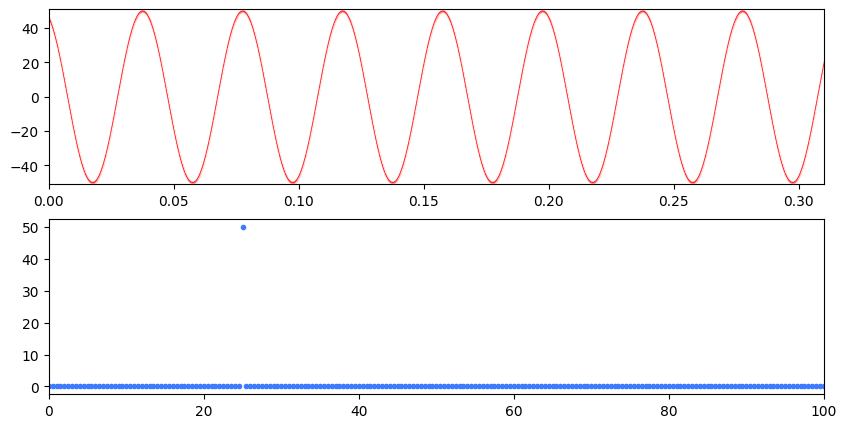

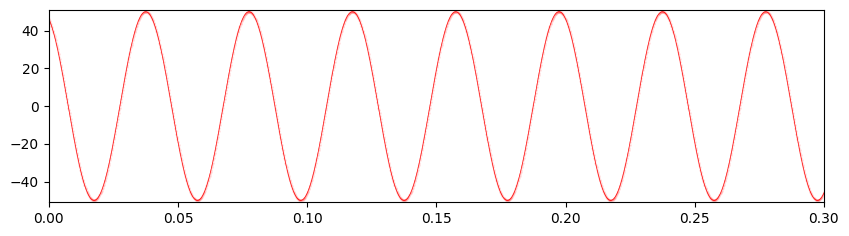

True

In [43]:
## EXAMPLE
N = 10000           # Sample points     
T = 1/5000          # Spacing
# Total duration N * T= 2
t = np.linspace(0.0, N*T, N, endpoint=False) # Time: Vector of 10,000 elements from 0 to N*T=2.
frequency = np.fft.fftfreq(t.size, d=T)      # Normalized Fourier frequencies in spectrum.

f0 = 25             # Frequency of the sampled wave
phi = np.pi/8       # Phase
A = 50              # Amplitude

s = A * np.cos(2 * np.pi * f0 * t + phi) # Signal
S = np.fft.fft(s)   # Unnormalized FFT

index = np.argmax(np.abs(S))
magnitude = np.abs(S[index]) * 2/N
freq_max = frequency[index]
phase = np.arctan(np.imag(S[index])/np.real(S[index]))
print(f"magnitude: {magnitude}, freq_max: {freq_max}, phase: {phase}")

fig, [ax1,ax2] = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))
ax1.plot(t,s, linewidth=0.5, linestyle='-', color='r', marker='o', markersize=1, markerfacecolor=(1, 0, 0, 0.1))  
ax1.set_xlim([0, .31])
ax1.set_ylim([-51,51])
ax2.plot(frequency[0:N//2], 2/N * np.abs(S[0:N//2]), '.', color='xkcd:lightish blue', label='amplitude spectrum')
plt.xlim([0, 100])
plt.show()

Re = np.real(S[index])
Im = np.imag(S[index])
phase = np.arctan(np.imag(S[index])/np.real(S[index]))

s_recon = abs(S[index])*2/N * np.cos(2 * np.pi * freq_max * t + phase) # + abs(Im)*2/N * np.sin(-2 * np.pi * freq_max * t -phase)

fig = plt.figure(figsize=(10, 2.5))

plt.xlim(0,0.3)
plt.ylim(-51,51)
plt.plot(t,s_recon, linewidth=0.5, linestyle='-', color='r', marker='o', markersize=1,markerfacecolor=(1, 0, 0, 0.1))  
plt.show()

s.all() == s_recon.all() ## Checking equality

In [44]:
from scipy.fft import fft, ifft
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_feather('data/PER_to_analyze.feather')

x = data['241560'].to_numpy()
y = fft(x)

In [68]:
sr = len(x)  # sampling rate         
T = 1/sr   # sample interval 
t = np.arange(0,1,T) # t = np.linspace(0.0, N*T, N, endpoint=False)   
frequency = np.fft.fftfreq(t.size, d=T)      # Normalized Fourier frequencies in spectrum.

N = len(y)
n = np.arange(N)
T = N/sr
freq = n/T 

c:\Users\user\projects\trader\venv\Lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


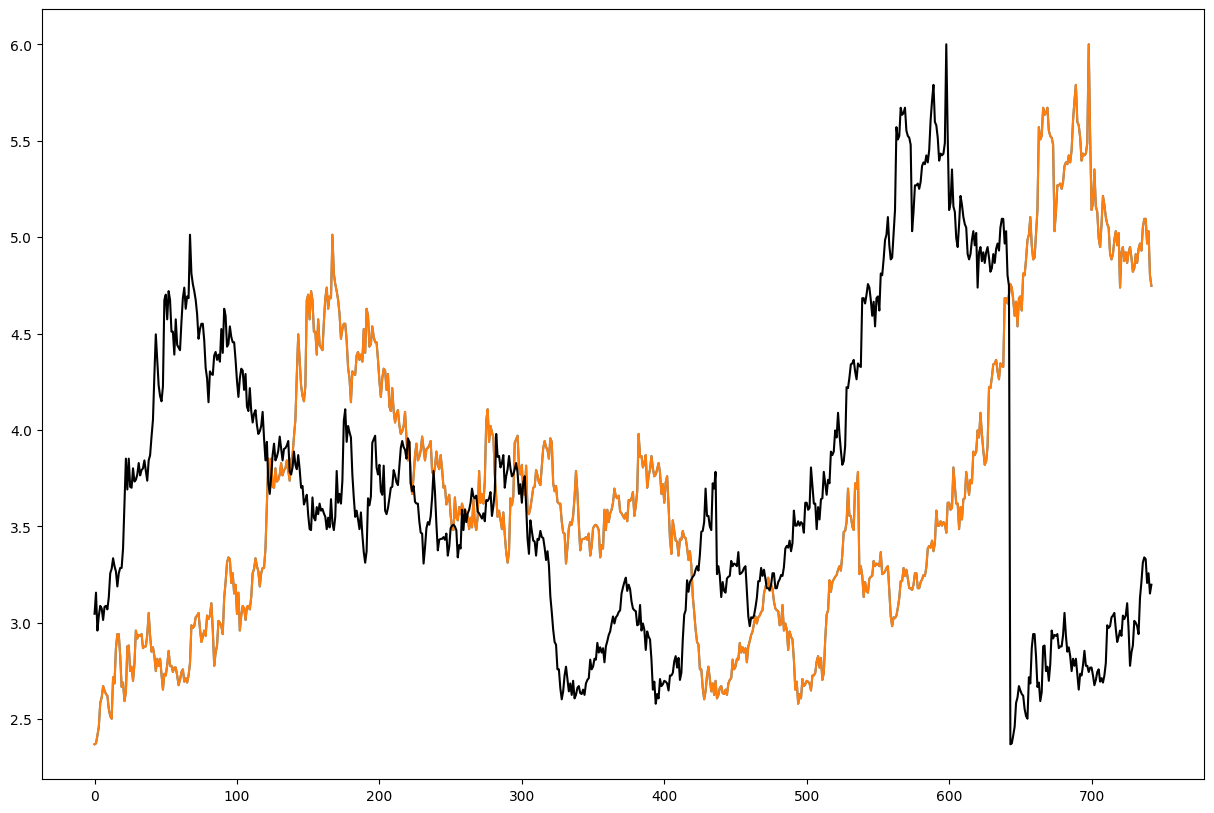

In [69]:

plt.figure(figsize=(15, 10))
# inverse FFT
plt.plot(ifft(y))

# reconstruction of the signal
s_recon = 0
for i in range(0,N):
    phase = np.arctan(np.imag(y[i])/np.real(y[i]))
    s_recon += np.real(y[i])*1/(N)*np.cos(2*np.pi*t*frequency[i])-np.imag(y[i])*1/N*np.sin(2*np.pi*t*frequency[i])
plt.plot(s_recon)

# shift of the reconstruction of the signal by 100 to see the extrapolation of the ability of forecast...
s_recon = 0
for i in range(0,N):
    phase = np.arctan(np.imag(y[i])/np.real(y[i]))
    shift = -100*1/sr
    s_recon += np.real(y[i])*1/(N)*np.cos(2*np.pi*(t-shift)*frequency[i])-np.imag(y[i])*1/N*np.sin(2*np.pi*(t-shift)*frequency[i])
plt.plot(s_recon, color='k') # color in black


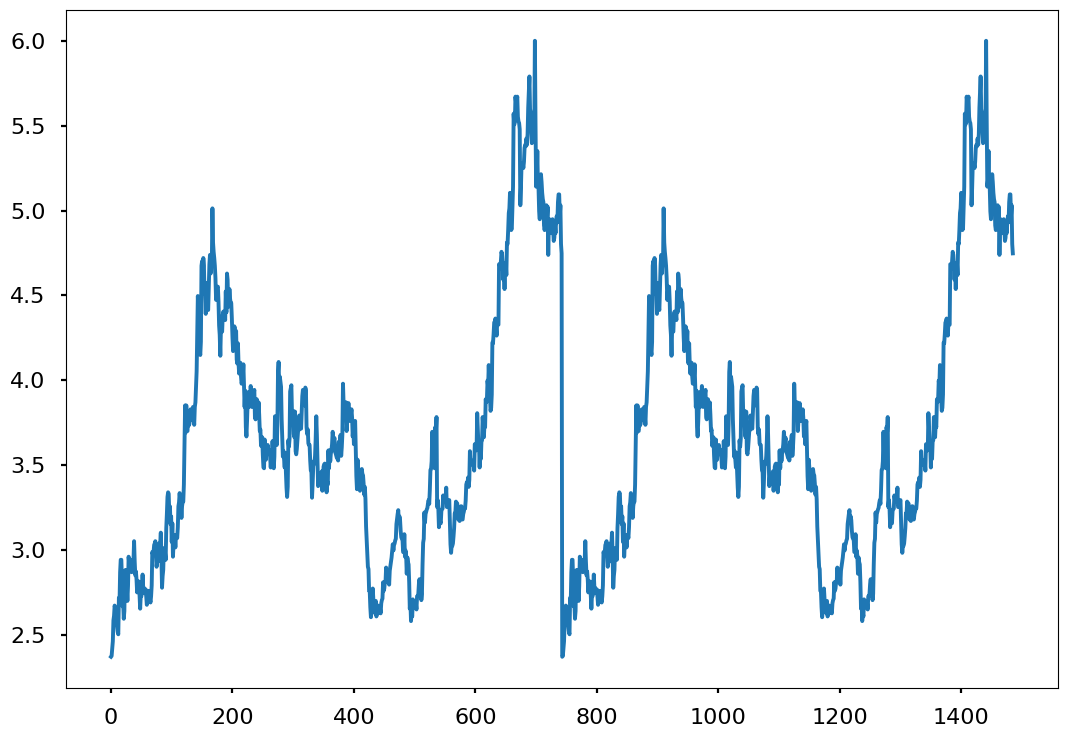

In [388]:
# test of longer period plotting
s_recon = 0
sr = len(x)  # sampling rate         
T = 1/sr   # sample interval 
t = np.arange(0,2,T) 
for i in range(0,N):
    phase = np.arctan(np.imag(y[i])/np.real(y[i]))
    s_recon += np.real(y[i])*1/(N)*np.cos(2*np.pi*t*i)-np.imag(y[i])*1/N*np.sin(2*np.pi*t*i)
    # used i instead of frequency[i] 
plt.plot(s_recon)

In [71]:
# ANOTHER EXAMPLE

import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-poster')
%matplotlib inline

C:\Users\user\AppData\Local\Temp\ipykernel_348296\2892268025.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


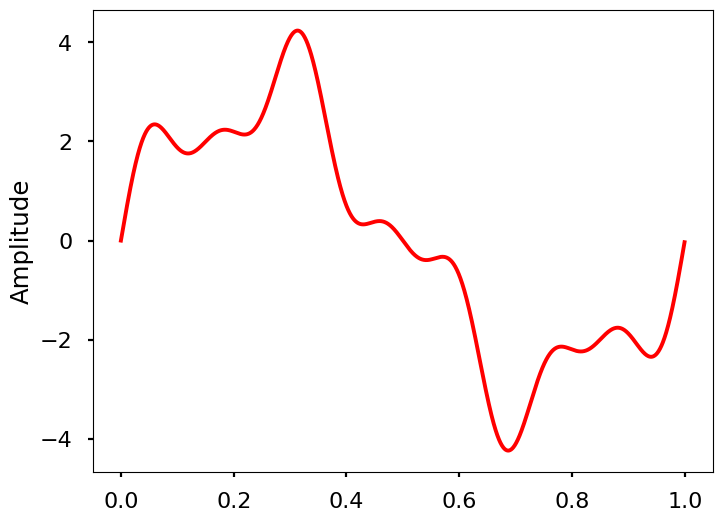

In [72]:
# sampling rate
sr = 2000
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

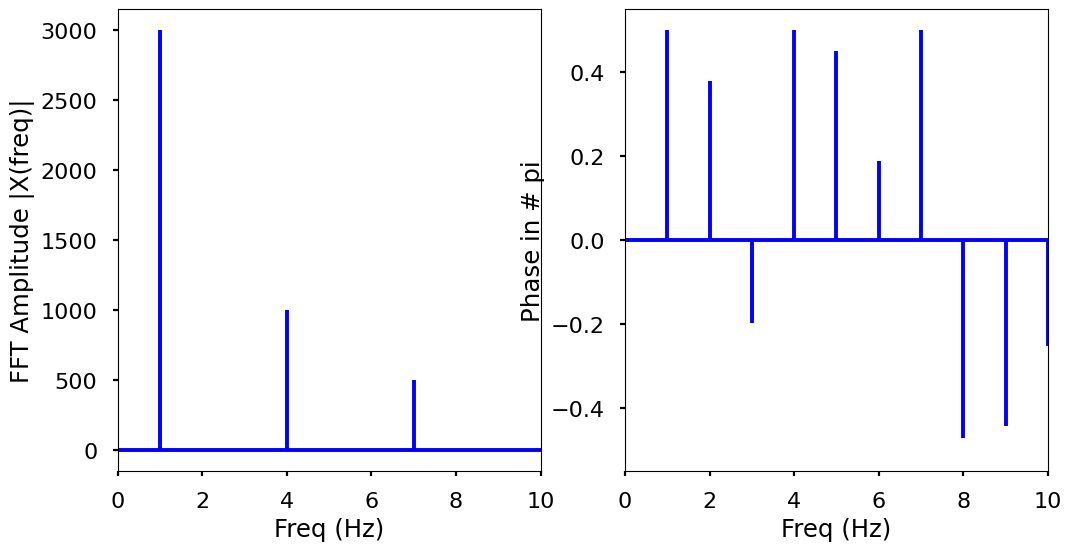

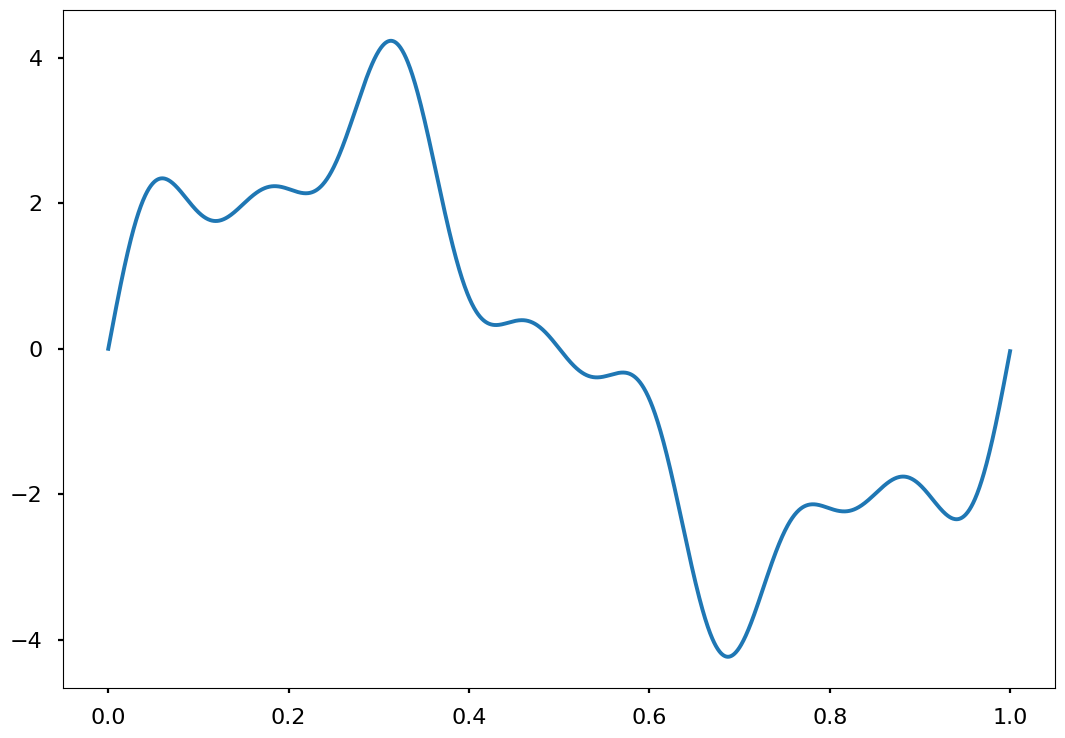

In [79]:
from numpy.fft import fft, ifft

X = fft(x)
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.stem(freq, np.arctan(np.imag(X)/np.real(X))/np.pi, 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('Phase in # pi')
plt.xlim(0, 10)
plt.show()

s_recon = 0
for i in range(0,N//2):
    phase = np.arctan(np.imag(X[i])/np.real(X[i]))
    s_recon += abs(X[i])*2/N*np.cos(n/N*2*np.pi*i-phase)

xf = np.linspace(0.0, 1.0, N)
plt.plot(xf, s_recon)
